In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
df = pd.read_csv('Dirty UGRansome.csv')

In [ ]:
df

,50,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1.1,500,5,A.1,Bonet,5061,SS
0,40,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,504,8,A,Bonet,5061,SS
1,30,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,508,7,A,Bonet,5061,SS
2,20,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,512,15,A,Bonet,5061,SS
3,57,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,516,9,A,Bonet,5061,SS
4,41,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,520,17,A,Bonet,5061,SS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207528,12,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1964,2986,6081,A,UDP Scan,5062,A
207529,8,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1968,2992,6092,A,UDP Scan,5062,A
207530,8,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1972,2998,6103,A,UDP Scan,5062,A
207531,8,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1976,3004,6114,A,UDP Scan,5062,A


In [ ]:
# Remove duplicates based on all columns
df = df.drop_duplicates()

In [ ]:
# Check for duplicates
duplicates_exist = df.duplicated().any()

if duplicates_exist:
    print("Duplicates exist in the DataFrame.")
else:
    print("No duplicates found in the DataFrame.")

No duplicates found in the DataFrame.


In [ ]:
# Removes rows with any missing values
df = df.dropna()

# Returns the count of missing values in each column
df.isnull().sum()

50          0
TCP         0
A           0
WannaCry    0
1           0
1DA11mPS    0
1BonuSr7    0
1.1         0
500         0
5           0
A.1         0
Bonet       0
5061        0
SS          0
dtype: int64

In [ ]:
#Statistical summary
df.describe()

,50,1,1.1,500,5,5061
count,149042.000000,149042.000000,149042.000000,149042.000000,149042.000000,149042.000000
mean,21.466788,2.349304,30.554803,14863.537486,2021.292179,5063.949987
std,15.883480,2.828766,101.447413,26849.498955,2271.422603,2.696009
min,-10.000000,1.000000,1.000000,1.000000,1.000000,5061.000000
25%,8.000000,1.000000,8.000000,512.000000,353.000000,5062.000000
50%,19.000000,1.000000,13.000000,4321.000000,1031.000000,5062.000000
75%,32.000000,2.000000,22.000000,18454.000000,3188.000000,5066.000000
max,96.000000,12.000000,1980.000000,126379.000000,12360.000000,5068.000000


In [ ]:
df.value_counts()

50   TCP  A    WannaCry  1  1DA11mPS  1BonuSr7  1.1  500   5     A.1  Bonet          5061  SS
-10  TCP  APS  APT       9  1GZkujBR  18e372GN  4    1     32    B    Port Scanning  5066  A     1
 25  UDP  ASF  APT       1  17dcMo4V  1DiCeTjB  3    768   1548  A    DoS            5062  SS    1
                            1GZkujBR  1DiCeTjB  3    597   921   A    SSH            5061  SS    1
                                                           5464  A    DoS            5061  SS    1
                                                     768   1548  A    DoS            5062  SS    1
                                                                                                ..
 11  UDP  AF   Flyper    2  1GZkujBR  18e372GN  2    2586  84    A    Port Scanning  5068  A     1
                                                           2836  A    UDP Scan       5068  A     1
                                                28   2124  18    A    Port Scanning  5066  A     1
               

In [ ]:
df.shape

(149042, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149042 entries, 0 to 206825
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   50        149042 non-null  int64 
 1   TCP       149042 non-null  object
 2   A         149042 non-null  object
 3   WannaCry  149042 non-null  object
 4   1         149042 non-null  int64 
 5   1DA11mPS  149042 non-null  object
 6   1BonuSr7  149042 non-null  object
 7   1.1       149042 non-null  int64 
 8   500       149042 non-null  int64 
 9   5         149042 non-null  int64 
 10  A.1       149042 non-null  object
 11  Bonet     149042 non-null  object
 12  5061      149042 non-null  int64 
 13  SS        149042 non-null  object
dtypes: int64(6), object(8)
memory usage: 17.1+ MB


In [ ]:
df.columns = ["Time", "Protocol", "Flag", "Family", "Cluster", "SeedAddress", "ExpAddress", "BTC", "USD", "Netflow_Bytes", "IPaddress", "Threats", "Port", "Prediction"]

In [ ]:
df

,Time,Protocol,Flag,Family,Cluster,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,40,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,504,8,A,Bonet,5061,SS
1,30,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,508,7,A,Bonet,5061,SS
2,20,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,512,15,A,Bonet,5061,SS
3,57,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,516,9,A,Bonet,5061,SS
4,41,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,520,17,A,Bonet,5061,SS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206821,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1010,1590,3340,A,Scan,5062,A
206822,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1014,1596,3351,A,Scan,5062,A
206823,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1018,1602,3362,A,Scan,5062,A
206824,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1022,1608,3373,A,Scan,5062,A


In [ ]:
#Statistical summary
df.describe()

,Time,Cluster,BTC,USD,Netflow_Bytes,Port
count,149042.000000,149042.000000,149042.000000,149042.000000,149042.000000,149042.000000
mean,21.466788,2.349304,30.554803,14863.537486,2021.292179,5063.949987
std,15.883480,2.828766,101.447413,26849.498955,2271.422603,2.696009
min,-10.000000,1.000000,1.000000,1.000000,1.000000,5061.000000
25%,8.000000,1.000000,8.000000,512.000000,353.000000,5062.000000
50%,19.000000,1.000000,13.000000,4321.000000,1031.000000,5062.000000
75%,32.000000,2.000000,22.000000,18454.000000,3188.000000,5066.000000
max,96.000000,12.000000,1980.000000,126379.000000,12360.000000,5068.000000


In [ ]:
df['Time'].value_counts()

20    11393
1      6845
7      6359
10     5193
4      4848
      ...  
84        1
87        1
90        1
93        1
96        1
Name: Time, Length: 87, dtype: int64

In [ ]:
df['Protocol'].value_counts()

TCP     68114
UDP     43394
ICMP    37534
Name: Protocol, dtype: int64

In [ ]:
df['Flag'].value_counts()

AF       53942
APS      25177
R        17549
APSF     16047
ARF      11685
AP        9883
ASF       7836
APRSF     5286
A         1637
Name: Flag, dtype: int64

In [ ]:
df['Family'].value_counts()

Locky               25062
SamSam              19657
WannaCry            16109
JigSaw              13712
Flyper              12014
DMALocker           11360
APT                  9730
CryptXXX             9335
Razy                 7862
Globe                7373
EDA2                 6054
TowerWeb             4381
Cryptohitman         4134
NoobCrypt            1248
CryptoLocker          788
CryptoLocker2015      150
Globev3                73
Name: Family, dtype: int64

In [ ]:
df['Cluster'].value_counts()

1     96823
2     25033
3      9234
9      9125
11     6591
10     1565
8       476
7       174
12       21
Name: Cluster, dtype: int64

In [ ]:
df['SeedAddress'].value_counts()

1DA11mPS    58452
17dcMo4V    40201
1GZkujBR    31569
1NKi9AK5    14763
1AEoiHYZ     3096
1KZKcvx4      961
Name: SeedAddress, dtype: int64

In [ ]:
df['ExpAddress'].value_counts()

1DiCeTjB    56311
1SYSTEMQ    36656
18e372GN    29460
1BonuSr7    15121
1CLag5cd     8641
1Lc7xTpP     2780
1              73
Name: ExpAddress, dtype: int64

In [ ]:
df['BTC'].value_counts()

30      19520
11      18346
2       12340
9       11970
22      10742
        ...  
1890        1
1894        1
1898        1
1902        1
1980        1
Name: BTC, Length: 1087, dtype: int64

In [ ]:
df['USD'].value_counts()

1        16392
21345    15576
18454    10591
4321      1971
50991     1087
         ...  
2484         1
2478         1
2472         1
2466         1
3240         1
Name: USD, Length: 5267, dtype: int64

In [ ]:
df['Netflow_Bytes'].value_counts()

98      320
56      268
86      249
26      247
74      246
       ... 
3593      1
3637      1
3659      1
3670      1
6953      1
Name: Netflow_Bytes, Length: 5818, dtype: int64

In [ ]:
df['IPaddress'].value_counts()

C    67699
A    48788
B    29650
D     2905
Name: IPaddress, dtype: int64

In [ ]:
df['Threats'].value_counts()

SSH              24726
Spam             23207
UDP Scan         20781
Bonet            16522
Blacklist        16356
Port Scanning    15910
DoS              12731
Scan             12568
NerisBonet        6241
Name: Threats, dtype: int64

In [ ]:
df['Port'].value_counts()

5066    43783
5062    43258
5061    36644
5068    25357
Name: Port, dtype: int64

In [ ]:
df['Prediction'].value_counts()

S     66380
A     42561
SS    40101
Name: Prediction, dtype: int64

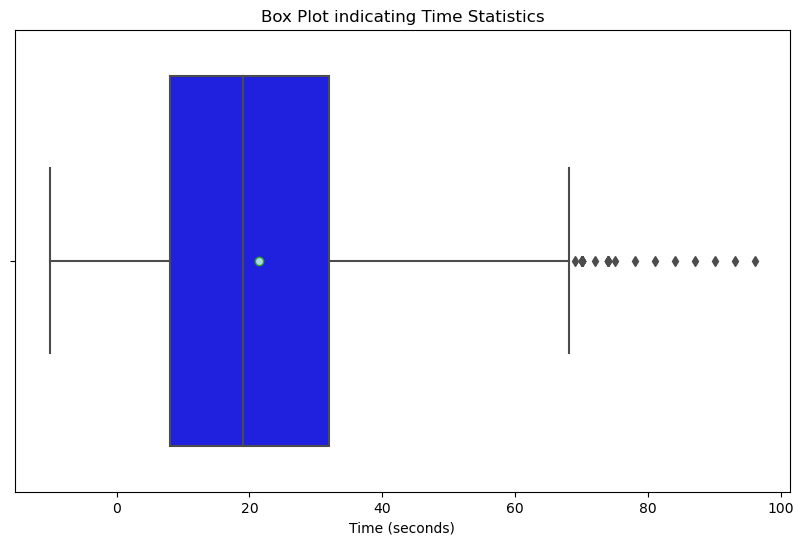

In [ ]:
# Define a custom color for the means points (lighter blue)
mean_color = 'lightblue'

# Create a box plot with means shown in the custom color
plt.figure(figsize=(10, 6))
sns.boxplot(x='Time', data=df, color='blue', showmeans=True, meanprops={"marker":"o", "markerfacecolor": mean_color})  # Set showmeans=True and customize meanprops
plt.title('Box Plot indicating Time Statistics')
plt.xlabel('Time (seconds)')
plt.show()

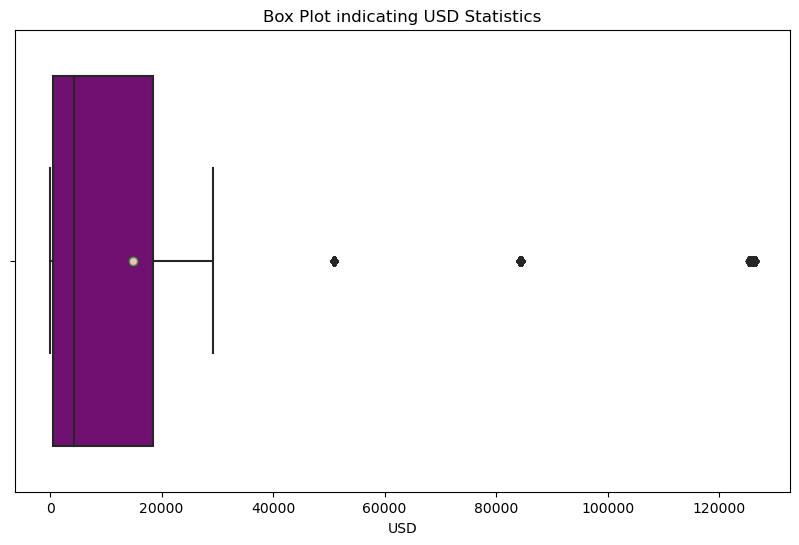

In [ ]:
# Define a custom color for the means points (lighter blue)
mean_color = 'lightpink'

# Create a box plot with means shown in the custom color for the 'USD' column
plt.figure(figsize=(10, 6))
sns.boxplot(x='USD', data=df, color='purple', showmeans=True, meanprops={"marker":"o", "markerfacecolor": mean_color})  # Set showmeans=True and customize meanprops
plt.title('Box Plot indicating USD Statistics')
plt.xlabel('USD')
plt.show()


In [ ]:
df

,Time,Protocol,Flag,Family,Cluster,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,40,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,504,8,A,Bonet,5061,SS
1,30,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,508,7,A,Bonet,5061,SS
2,20,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,512,15,A,Bonet,5061,SS
3,57,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,516,9,A,Bonet,5061,SS
4,41,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,520,17,A,Bonet,5061,SS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206821,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1010,1590,3340,A,Scan,5062,A
206822,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1014,1596,3351,A,Scan,5062,A
206823,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1018,1602,3362,A,Scan,5062,A
206824,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1022,1608,3373,A,Scan,5062,A


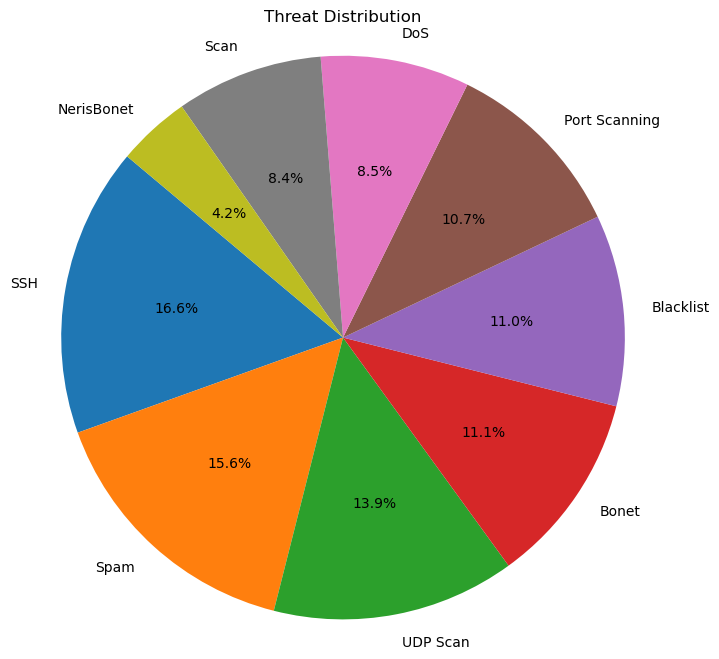

In [ ]:
# Data
threats = ['SSH', 'Spam', 'UDP Scan', 'Bonet', 'Blacklist', 'Port Scanning', 'DoS', 'Scan', 'NerisBonet']
counts = [24726, 23207, 20781, 16522, 16356, 15910, 12731, 12568, 6241]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=threats, autopct='%1.1f%%', startangle=140)
plt.title('Threat Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the chart
plt.show()

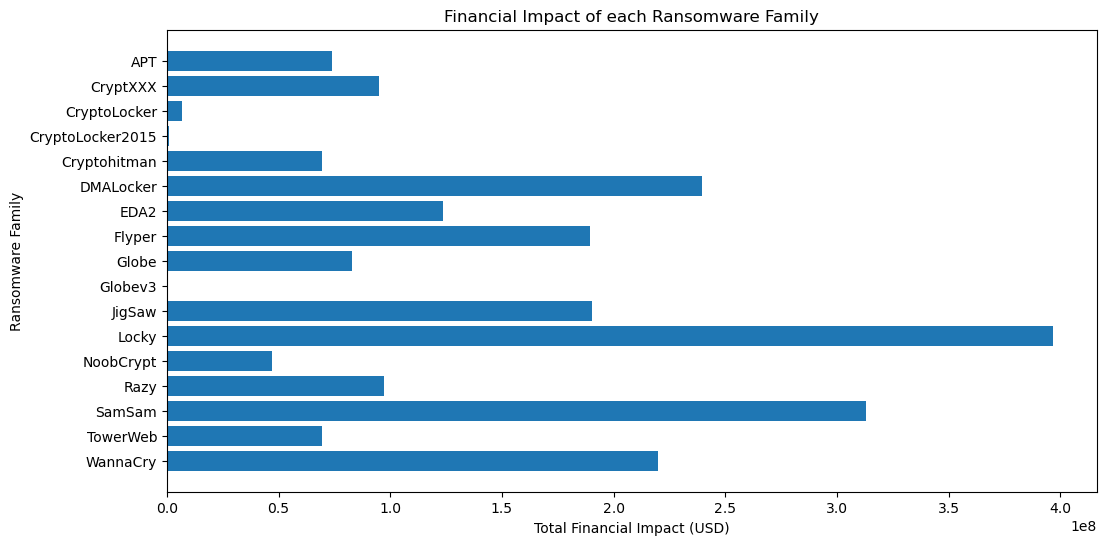

In [ ]:
# Group by 'Family' and sum the 'USD' values for each family
family_usd_sum = df.groupby('Family')['USD'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.barh(family_usd_sum['Family'], family_usd_sum['USD'])
plt.xlabel('Total Financial Impact (USD)')
plt.ylabel('Ransomware Family')
plt.title('Financial Impact of each Ransomware Family')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest impact at the top

# Show the plot
plt.show()

In [ ]:
# Filter the DataFrame for only the "Locky" family
locky_df = df[df['Family'] == 'Locky']

# Count the occurrences of each protocol in the Locky family
protocol_counts = locky_df['Protocol'].value_counts()

# Define a color palette
colors = ['blue', 'green', 'orange']

# Create a bar plot with custom colors and labels
plt.figure(figsize=(8, 6))
ax = protocol_counts.plot(kind='bar', color=colors)

# Adding labels inside the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.title('Protocols Used by "Locky" Family')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
locky_df = df[df['Family'] == 'Locky']

# Count the occurrences of each threat in the Locky family
threat_counts = locky_df['Threats'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
threat_counts.plot(kind='bar')
plt.title('Threats Used by "Locky" Family')
plt.xlabel('Threat')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Filter the DataFrame for only the "Locky" family
locky_df = df[df['Family'] == 'Locky']

# Count the occurrences of each threat in the Locky family
threat_counts = locky_df['Threats'].value_counts()

# Create a bar plot with different colors for each bar
plt.figure(figsize=(11, 7))
ax = threat_counts.plot(kind='bar', colormap='viridis')  # You can choose a different colormap

plt.title('Threats Used by "Locky" Family')
plt.xlabel('Threat')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adding color bars to the legend
for bar, count in zip(ax.patches, threat_counts.values):
    ax.annotate(str(count), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom')

plt.show()